<a href="https://colab.research.google.com/github/dubba1212/AIML/blob/master/Assignment_(7_07_2020).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please provide at least three merits and demerits of the best algorithm.

Apply GridsearchCV for the best algorithm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/sumathi16/Datasets/master/Human_Resources_Employee_Attrition.csv").head(200)
data

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
195,0.09,0.80,6,304,4,0,1,0,technical,low
196,0.27,0.54,7,278,3,0,1,0,technical,low
197,0.10,0.91,6,287,4,0,1,0,technical,low
198,0.10,0.89,7,285,4,0,1,0,technical,low


In [3]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_monthly_hours    0
years_at_company         0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [4]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_of_projects         int64
average_monthly_hours      int64
years_at_company           int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [6]:
data.nunique()

satisfaction_level        45
last_evaluation           41
number_of_projects         6
average_monthly_hours    101
years_at_company           5
work_accident              2
left                       1
promotion_last_5years      2
department                 9
salary                     3
dtype: int64

In [7]:
X = data.drop('salary', axis=1)
X.shape

(200, 9)

In [8]:
X= pd.get_dummies(X)
X.shape

(200, 17)

In [9]:
y=data['salary']
y.shape

(200,)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 17)
(50, 17)
(150,)
(50,)


In [12]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() # creating an object for Logistic Regression
log_reg.fit(X_train, y_train)
y_train_pred = log_reg.predict(X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [13]:
## accuracy_score---> With help of this metric, we can evaluate the overall 
## performance of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.7733333333333333

In [14]:
# Importing the package
from sklearn.ensemble import AdaBoostClassifier
# Instance creation
adc = AdaBoostClassifier()
# Train the model
adc.fit(X_train,y_train)
# prediction
y_pred = adc.predict(X_test)

In [15]:
accuracy_score(y_pred,y_test)

0.66

In [16]:
accuracy_score(y_train,adc.predict(X_train))

0.7133333333333334

In [17]:
adc = AdaBoostClassifier(learning_rate=0.5,n_estimators=25)
# Train the model
adc.fit(X_train,y_train)
# prediction
y_pred = adc.predict(X_test)

In [18]:
accuracy_score(y_pred,y_test)

0.66

In [19]:
accuracy_score(y_train,adc.predict(X_train))

0.6866666666666666

In [20]:
# Importing the package
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
# Instance creation with base estimator
adc = AdaBoostClassifier(base_estimator = LogisticRegression())
#Train the model
adc.fit(X_train,y_train)
# Prediction
y_pred= adc.predict(X_test)
print("test accuracy:",accuracy_score(y_pred,y_test))
print("train accuracy:",accuracy_score(y_train,adc.predict(X_train)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


test accuracy: 0.7
train accuracy: 0.76


In [21]:
import xgboost

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
gdc = GradientBoostingClassifier(n_estimators=40,learning_rate=0.5)
gdc.fit(X_train,y_train)
#prediction
y_pred = gdc.predict(X_test)
print("test accuracy:",accuracy_score(y_pred,y_test))
print("train accuracy:",accuracy_score(y_train,gdc.predict(X_train)))

test accuracy: 0.68
train accuracy: 1.0


In [23]:

import xgboost as xgb
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
# make prediction
preds =xgb.predict(X_test)
print("test accuracy:",accuracy_score(preds,y_test))
print("train accuracy:",accuracy_score(y_train,xgb.predict(X_train)))

test accuracy: 0.68
train accuracy: 0.92


###xgboost is the best algorithm

In [24]:
from sklearn.tree import DecisionTreeClassifier
# intialization of object
dtree = DecisionTreeClassifier(criterion = 'entropy')
#Applying the classifier to the dataset
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
y_train_pred=xgb.predict(X_train)
y_train_pred

array(['medium', 'low', 'medium', 'low', 'low', 'low', 'medium', 'low',
       'low', 'low', 'medium', 'low', 'low', 'medium', 'low', 'low',
       'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'medium', 'low',
       'medium', 'low', 'low', 'medium', 'low', 'low', 'medium', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'medium',
       'low', 'medium', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'medium', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'medium', 'low', 'low', 'low', 'low', 'low', 'medium', 'low',
       'medium', 'medium', 'low', 'medium', 'low', 'medium', 'medium',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'medium', 'low', 'low', 'low', 'low',
       'low', 

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00         2
         low       0.91      1.00      0.95       110
      medium       0.97      0.74      0.84        38

    accuracy                           0.92       150
   macro avg       0.62      0.58      0.60       150
weighted avg       0.91      0.92      0.91       150



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


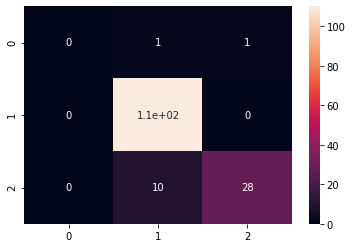

In [27]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True)

In [28]:
y_test_pred = xgb.predict(X_test) # corresponding output of X_test is stored in y_test
# Compare the actual y_test values with model predicted y_test_pred
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00         1
         low       0.74      0.86      0.80        37
      medium       0.29      0.17      0.21        12

    accuracy                           0.68        50
   macro avg       0.34      0.34      0.34        50
weighted avg       0.62      0.68      0.64        50



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


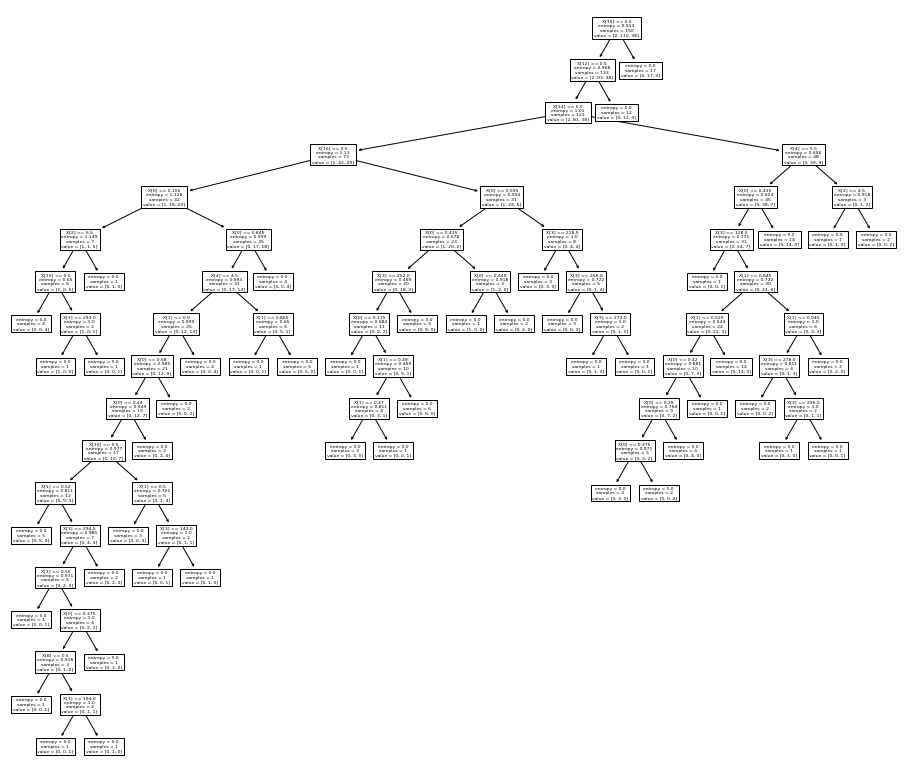

In [29]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(16,14))
tree.plot_tree(dtree)
plt.show()

In [30]:
grid_param={'criterion' : ['gini','entropy'],
           'max_depth' : range(2,32,1),
           'min_samples_leaf' : range(1,10,1)}

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
grid_search = GridSearchCV(estimator=dtree,param_grid = grid_param)
clf = DecisionTreeClassifier()
# applying gridsearch onto dataset
grid_search.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
             

In [33]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}

In [34]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_leaf=1)
# We need to fit the model to the data
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
# Prediction on test data
pred_test = clf.predict(X_test)
#Classification Report of actual values 
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00         1
         low       0.74      1.00      0.85        37
      medium       0.00      0.00      0.00        12

    accuracy                           0.74        50
   macro avg       0.25      0.33      0.28        50
weighted avg       0.55      0.74      0.63        50



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
